In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import os
import glob

from datetime import datetime, timedelta, date
from mechafil import data
import pandas as pd
import numpy as np

from agentfil import plot_utils

import copy

In [10]:
purples = mpl.colormaps['Purples']
blues = mpl.colormaps['Blues']
greens = mpl.colormaps['Greens']
oranges = mpl.colormaps['Oranges']
reds = mpl.colormaps['Reds']

In [26]:
colors = [blues, oranges, greens, purples, reds]
results_root_dir=os.path.join(os.environ['HOME'],'agentfil','miner_proportion', 'exp')

rb_onboard = 6
renewal_rate = 0.6

# filp_agent_power_distribution_vec = np.arange(0.3, 0.7+0.1, 0.1)    
filp_agent_power_distribution_vec = np.arange(0.3, 0.5+0.1, 0.1)    
fil_supply_discount_rate_vec = [20, 30]

filplus_agent_discount_rate = 25
normal_cc_agent_discount_rate_multiplier = 1
filplus_agent_optimism = 4
normal_cc_agent_optimism = 4

normal_cc_agent_discount_rate = filplus_agent_discount_rate * normal_cc_agent_discount_rate_multiplier

experiment_dirs = []
experiment_names = []
plt_kwargs_list = []

baseline_fpr = 0.8
baseline_sector_duration = 360
baseline_folder = os.path.join(os.environ['HOME'],'agentfil','baseline')
baseline_experiment = 'BaselineDCA_RBP_%0.02f-RR_%0.02f-FPR_%0.02f-Dur_%0.02f' % \
                (rb_onboard, renewal_rate, baseline_fpr, baseline_sector_duration)
baseline_filecoin_df = pd.read_csv(os.path.join(baseline_folder, baseline_experiment, 'filecoin_df.csv'))

cmap_access_vec = np.linspace(0.1, 0.9, len(filp_agent_power_distribution_vec))
for ii, fil_supply_discount_rate in enumerate(fil_supply_discount_rate_vec):
    for jj, filp_agent_power in enumerate(filp_agent_power_distribution_vec):
        normal_cc_agent_discount_rate = normal_cc_agent_discount_rate_multiplier * filplus_agent_discount_rate

        name = 'MinerProportionSensitivity,FILP_%d,%d,%0.02f,CC_%d,%d,Onboard_%0.02f,RR_%0.02f,DR_%d' % \
            (
                filplus_agent_optimism, filplus_agent_discount_rate, filp_agent_power,
                normal_cc_agent_optimism, normal_cc_agent_discount_rate, 
                rb_onboard, renewal_rate, fil_supply_discount_rate,
            )
        
        experiment_dirs.append(name)
        plt_kwargs = {
            'color': colors[ii](cmap_access_vec[jj])
        }
        plt_kwargs_list.append(plt_kwargs)
        experiment_names.append('%d/%0.02f' % (fil_supply_discount_rate, filp_agent_power))
        

# plot settings
min_agent_plot_date = date(2023, 4, 1)
max_agent_plot_date = date(2026, 12, 31)

min_kpi_plot_date = None
max_kpi_plot_date = date(2026, 12, 31)

save_dir = os.path.join('/Users/kiran/Documents/ced_austin')

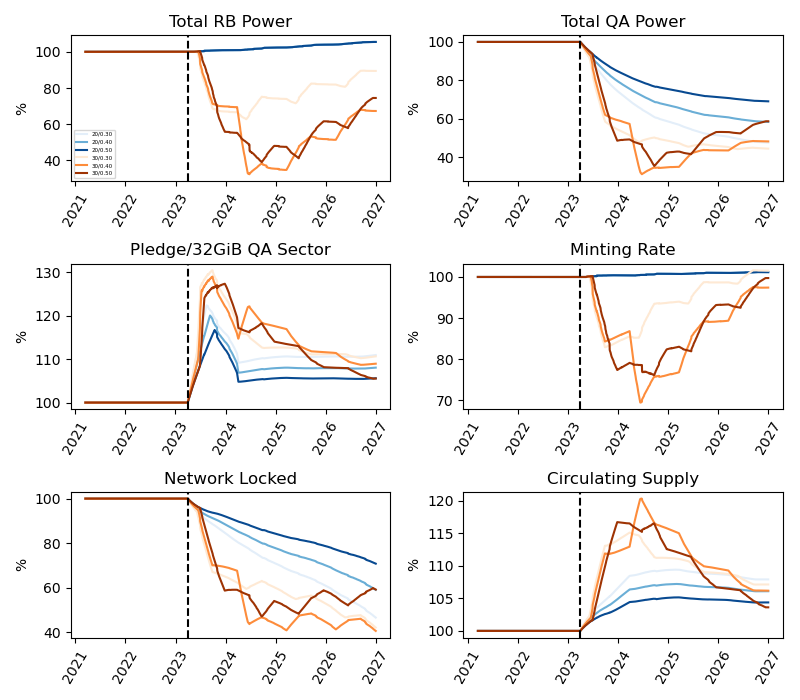

In [27]:
x_post_fn = plot_utils.x_post_fn
plt_baseline_relative = True

plt.figure(figsize=(8,7))

plt.subplot(3,2,1)
plot_utils.plot_experiments(
    experiment_names, results_root_dir, baseline_filecoin_df,
    ['total_raw_power_eib'], experiment_dirs, 
                 x_post_process=x_post_fn, 
                 y_post_process=None,
                 x_key='date', labels=experiment_names,
                 min_date = min_kpi_plot_date, max_date = max_kpi_plot_date,
                 plot_kwargs_list=plt_kwargs_list,
                 baseline_relative=plt_baseline_relative)
plt.axvline(date(2023,4,1), linestyle='--', color='k')
plt.title('Total RB Power')
if plt_baseline_relative:
    plt.ylabel('%')
else:
    plt.ylabel('EiB')
plt.legend(fontsize=4)


plt.subplot(3,2,2)
plot_utils.plot_experiments(
    experiment_names, results_root_dir, baseline_filecoin_df,
    ['total_qa_power_eib'], experiment_dirs, 
                 x_post_process=x_post_fn, 
                 y_post_process=None,
                 min_date = min_kpi_plot_date, max_date = max_kpi_plot_date,
                 x_key='date', labels=None, plot_kwargs_list=plt_kwargs_list,
                 baseline_relative=plt_baseline_relative)
plt.axvline(date(2023,4,1), linestyle='--', color='k')
plt.title('Total QA Power')
if plt_baseline_relative:
    plt.ylabel('%')
else:
    plt.ylabel('EiB')


plt.subplot(3,2,3)
plot_utils.plot_experiments(
    experiment_names, results_root_dir, baseline_filecoin_df,
    ['day_pledge_per_QAP'], experiment_dirs, 
                 x_post_process=x_post_fn, 
                 y_post_process=None,
                 min_date = min_kpi_plot_date, max_date = max_kpi_plot_date,
                 x_key='date', labels=None, plot_kwargs_list=plt_kwargs_list,
                 baseline_relative=plt_baseline_relative)
plt.axvline(date(2023,4,1), linestyle='--', color='k')
plt.title('Pledge/32GiB QA Sector')
if plt_baseline_relative:
    plt.ylabel('%')
else:
    plt.ylabel('FIL')

plt.subplot(3,2,4)
plot_utils.plot_experiments(
    experiment_names, results_root_dir, baseline_filecoin_df,
    ['day_network_reward'], experiment_dirs, 
                 x_post_process=x_post_fn, 
                 y_post_process=None,
                 min_date = min_kpi_plot_date, max_date = max_kpi_plot_date,
                 x_key='date', labels=None, plot_kwargs_list=plt_kwargs_list,
                 baseline_relative=plt_baseline_relative)
plt.axvline(date(2023,4,1), linestyle='--', color='k')
plt.title('Minting Rate')
if plt_baseline_relative:
    plt.ylabel('%')
else:
    plt.ylabel('FIL/day')
    

plt.subplot(3,2,5)
plot_utils.plot_experiments(
    experiment_names, results_root_dir, baseline_filecoin_df,
    ['network_locked'], experiment_dirs, 
                 x_post_process=x_post_fn, 
                 y_post_process=plot_utils.converttoMFIL,
                 min_date = min_kpi_plot_date, max_date = max_kpi_plot_date,
                 x_key='date', labels=None, plot_kwargs_list=plt_kwargs_list,
                 baseline_relative=plt_baseline_relative)
plt.axvline(date(2023,4,1), linestyle='--', color='k')
plt.title('Network Locked')
if plt_baseline_relative:
    plt.ylabel('%')
else:
    plt.ylabel('M-FIL')

plt.subplot(3,2,6)
plot_utils.plot_experiments(
    experiment_names, results_root_dir, baseline_filecoin_df,
    ['circ_supply'], experiment_dirs, 
                 x_post_process=x_post_fn, 
                 y_post_process=plot_utils.converttoMFIL,
                 min_date = min_kpi_plot_date, max_date = max_kpi_plot_date,
                 x_key='date', labels=None, plot_kwargs_list=plt_kwargs_list,
                 baseline_relative=plt_baseline_relative)
plt.axvline(date(2023,4,1), linestyle='--', color='k')
plt.title('Circulating Supply')
if plt_baseline_relative:
    plt.ylabel('%')
else:
    plt.ylabel('M-FIL')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'miner_proportion_kpi.png'))

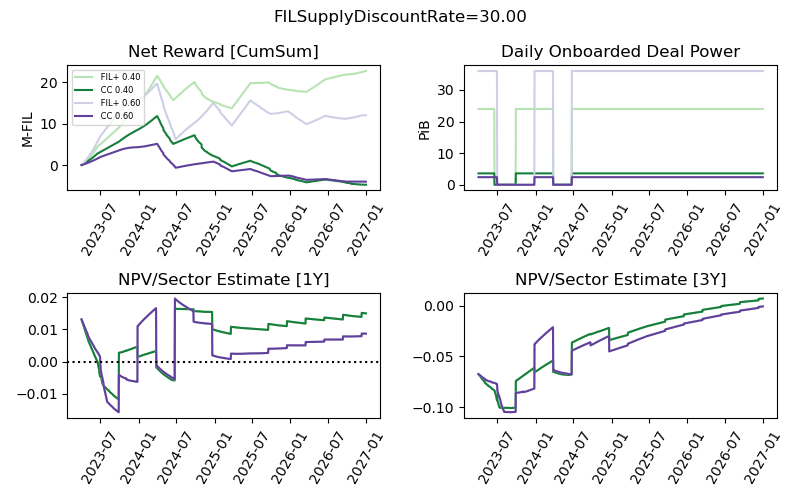

In [28]:
# investigate why less FIL+ leads to more onboarding in the DR=30 case??
colors = [greens, purples, blues, oranges, reds]

experiment_dirs = []
plt_kwargs_list = []
experiment_names = []

fil_supply_discount_rate = 30
filp_agent_power_distribution_vec = [0.4, 0.6]

cmap_access_vec = np.linspace(0.1, 0.9, len(filp_agent_power_distribution_vec))
for jj, filp_agent_power in enumerate(filp_agent_power_distribution_vec):
    normal_cc_agent_discount_rate = normal_cc_agent_discount_rate_multiplier * filplus_agent_discount_rate

    name = 'MinerProportionSensitivity,FILP_%d,%d,%0.02f,CC_%d,%d,Onboard_%0.02f,RR_%0.02f,DR_%d' % \
        (
            filplus_agent_optimism, filplus_agent_discount_rate, filp_agent_power,
            normal_cc_agent_optimism, normal_cc_agent_discount_rate, 
            rb_onboard, renewal_rate, fil_supply_discount_rate,
        )

    experiment_dirs.append(name)
    plt_kwargs = [{'color': colors[jj](0.3)}, {'color': colors[jj](0.8)}]
    plt_kwargs_list.append(plt_kwargs)
    experiment_names.append('%0.02f' % (filp_agent_power, ))
    
per_agent_label_list = ['FIL+', 'CC']

plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
keys = ['reward_FIL', 'pledge_interest_payment_FIL']
def compute_net_reward_FIL(key_data):
    net_reward_FIL = key_data['reward_FIL'].cumsum() - key_data['pledge_interest_payment_FIL'].cumsum()
    return net_reward_FIL/1_000_000
for ii, e in enumerate(experiment_dirs):
    exp_name = experiment_names[ii]
    plot_utils.plot_agent(
        results_root_dir,
        ['reward_FIL', 'pledge_interest_payment_FIL'], e,
               x_post_process=x_post_fn,
               y_post_process=compute_net_reward_FIL, 
               df_name='accounting_df', 
               label_postpend=exp_name, 
               per_agent_label_list=per_agent_label_list,
               plot_kwargs_list=plt_kwargs_list[ii],
               min_date = min_agent_plot_date, max_date = max_agent_plot_date,
              )
plt.title('Net Reward [CumSum]')
plt.ylabel('M-FIL')
plt.legend(fontsize=6)

plt.subplot(2,2,2)
def compute_deal_onboarded(key_data):
    total_onboards = key_data['deal_onboarded']
    return total_onboards
for ii, e in enumerate(experiment_dirs):
    exp_name = experiment_names[ii]
    plot_utils.plot_agent(
        results_root_dir,
        ['cc_onboarded', 'cc_renewed', 'deal_onboarded'], e,
               x_post_process=x_post_fn,
               y_post_process=compute_deal_onboarded, 
               df_name='agent_info_df', 
               label_postpend=exp_name,  
               per_agent_label_list=per_agent_label_list,
               plot_kwargs_list=plt_kwargs_list[ii],
               min_date = min_agent_plot_date, max_date = max_agent_plot_date,
              )
plt.title('Daily Onboarded Deal Power')
plt.ylabel('PiB')

plt.subplot(2,2,3)
for ii, e in enumerate(experiment_dirs):
    exp_name = experiment_names[ii]
    plot_utils.plot_agent(
        results_root_dir,
        ['npv_estimate_365'], e,
               x_post_process=x_post_fn,
               y_post_process=None, 
               df_name='agent_info_df', 
               label_postpend=exp_name,  
               per_agent_label_list=per_agent_label_list,
               plot_kwargs_list=plt_kwargs_list[ii],
               min_date = min_agent_plot_date, max_date = max_agent_plot_date,
              )
plt.axhline(0, color='k', linestyle=':')
plt.title('NPV/Sector Estimate [1Y]')

plt.subplot(2,2,4)
for ii, e in enumerate(experiment_dirs):
    exp_name = experiment_names[ii]
    plot_utils.plot_agent(
        results_root_dir,
        ['npv_estimate_1095'], e,
               x_post_process=x_post_fn,
               y_post_process=None, 
               df_name='agent_info_df', 
               label_postpend=exp_name,  
               per_agent_label_list=per_agent_label_list,
               plot_kwargs_list=plt_kwargs_list[ii],
               min_date = min_agent_plot_date, max_date = max_agent_plot_date,
              )
plt.title('NPV/Sector Estimate [3Y]')

plt.suptitle('FILSupplyDiscountRate=%0.02f' % \
             (fil_supply_discount_rate,))

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'miner_proportion_agents.png'))

In [29]:
"""
The explanation is that when you have a lot of FIL+ agents, even though the NPV estimate between
CC and FIL+ is the same, if FIL+ stops onboarding, it changes pledge which then effects future 
FIL+ onboarding, and it snowballs.  very counter-intuitive!

This is demonstration of emergence - pretty cool!
"""

'\nThe explanation is that when you have a lot of FIL+ agents, even though the NPV estimate between\nCC and FIL+ is the same, if FIL+ stops onboarding, it changes pledge which then effects future \nFIL+ onboarding, and it snowballs.  very counter-intuitive!\n\nThis is demonstration of emergence - pretty cool!\n'